<a href="https://colab.research.google.com/github/megsdata/sEMG_SupervisedLearning/blob/main/23May22_Simple_Keras_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/MSC_THESIS')

Mounted at /MSC_THESIS


In [4]:
%cd /MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS
#!ls
df = pd.read_excel('22-May-2023_DEEP_LEARNING_3subjects.xlsx', usecols='D, H, J')
df.head().T

/MSC_THESIS/MyDrive/School - Ryerson Graduate/MSC_THESIS


,0,1,2,3,4
PulseWidth,2.299034,2.299034,2.299034,2.299034,2.299034
PainLabel,1.000000,1.000000,1.000000,1.000000,1.000000
EMG_mv_,27.455004,36.682096,48.090407,57.477865,55.186837


In [5]:
#select features
X = df[['EMG_mv_', 'PulseWidth']]
y = df['PainLabel']

In [6]:
#create data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


https://towardsdatascience.com/how-to-train-a-classification-model-with-tensorflow-in-10-minutes-fd2b7cfba86#3a77

In [9]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
19013/19013 [==============================] - 72s 3ms/step - loss: 0.0245 - accuracy: 0.9901 - precision: 0.9899 - recall: 0.9989
Epoch 2/10
19013/19013 [==============================] - 66s 3ms/step - loss: 0.0046 - accuracy: 0.9987 - precision: 0.9992 - recall: 0.9993
Epoch 3/10
19013/19013 [==============================] - 66s 3ms/step - loss: 0.0041 - accuracy: 0.9992 - precision: 0.9995 - recall: 0.9996
Epoch 4/10
19013/19013 [==============================] - 66s 3ms/step - loss: 0.0025 - accuracy: 0.9994 - precision: 0.9996 - recall: 0.9997
Epoch 5/10
19013/19013 [==============================] - 66s 3ms/step - loss: 0.0020 - accuracy: 0.9996 - precision: 0.9997 - recall: 0.9998
Epoch 6/10
19013/19013 [==============================] - 66s 3ms/step - loss: 5.4285e-04 - accuracy: 0.9999 - precision: 0.9999 - recall: 0.9999
Epoch 7/10
19013/19013 [==============================] - 65s 3ms/step - loss: 3.5469e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.000

In [12]:
#visualize performance
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

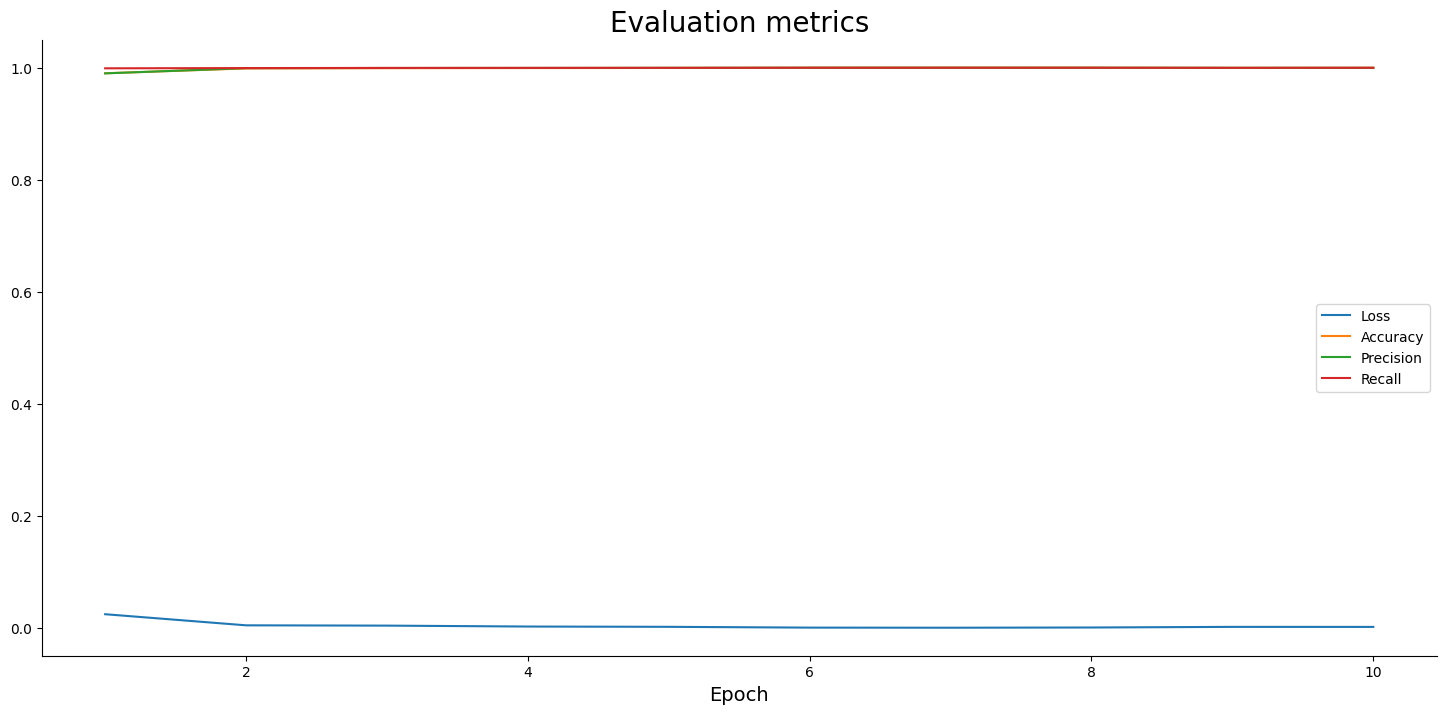

In [14]:
plt.plot(
    np.arange(1, 11), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 11), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 11), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 11), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [15]:
predictions = model.predict(X_test_scaled)

5942/5942 [==============================] - 8s 1ms/step


In [16]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [17]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[ 22361      0]
 [     0 167768]]


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
